### Part 1

Use Markov Chain Monte Carlo to estimate the distribution of likely values for $\mu$ for arrivals in a Poisson distribution. You are given 50 samples drawn from a Poisson distribution whose value of $\mu$ is unknown to you. Use MCMC to create a histogram of possible values for $\mu$. Recall from Week 4 that the steps in an MCMC simulation are as follows:

1. Pick a value for $\mu$ at random <br><br>
1. Create a *proposal* value by adding a small bit of noise onto $\mu$<br><br>
1. Compute the likelihood that the observed data was generated using $\mu$<br><br>
1. Compute the likelihood that the observed data was generated using $\mu_{proposal}$<br><br>
1. If $\mu_{proposal}$ has a greater likelihood, keep it as the new value of $\mu$<br><br>
1. If $\mu_{proposal}$ has a lower likelihood, keep it as the new value of $\mu$ with probability $\mu_{proposal} \div \mu$<br><br>
1. Repeat steps 2-6 many times<br><br>
1. The histogram of resulting $\mu$ values shows the distribution of likely values of $\mu$ (when histogramming, be sure to ignore the first 10% or so of the values of $\mu$ because they are biased by your initial condition)<br><br>

What does MCMC predict for the average value of $\mu$? How does that compare with the average of 50 samples you are given?

Hint: The overall likelihood is given by the *product* of the likelihoods of each of the 50 observations. However some of these probabilities can be quite small and so their products can vanish to zero, ruining our fun. A good alternative is to compute the *log-likelihoods* and then *add* them. The `scipy.stats.poisson` toolbox has functions for both `pmf` and `logpmf` to facilitate this for you.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats


In [2]:
# load the data from file
with open("data_1.npy","rb") as f:
    data = np.load(f)

print(data.shape)

(50,)


In [3]:
# your code goes here
print(np.mean(data)) # investigate the mean of given data
# comment everything!


8.38


In [16]:
# pick a starting value for the simulation
mu_init =   np.random.choice([1,10],1)       # Initial Mean

# set up the random number generator that will be used to advance p
# set up number of trials
nTrials = int(1e4)


# initialize variables
mu_vals    = np.zeros(nTrials,)    # Store all mu's
mu_vals[0] = mu_init
store_likeli_muold=[]
store_likeli_munew=[]
# iterate the simulation nTrials times
for i in range(1,nTrials):
   
    mu_updater = stats.norm(scale=.1).rvs()   # Add Randomness



    # pick new and old values of p
    mu_old = mu_vals[i-1]
    mu_new = mu_old + mu_updater

    # compute how likely each value of p is relative
    # to the observed outcomes

    
    store_like_muold=((stats.poisson(mu_old).logpmf(data)).sum()) # likelihood with old mu
    store_like_munew=((stats.poisson(mu_new).logpmf(data)).sum())  # likelihood with new mu
     
        
 
    
    np.seterr(divide='ignore', invalid='ignore')
    
    if 1 > (store_like_munew)/(store_like_muold):                # Compare which mu has higher likelihood 
        mu_vals[i]=mu_new                        
    else:
        mu_vals[i]=mu_old

        

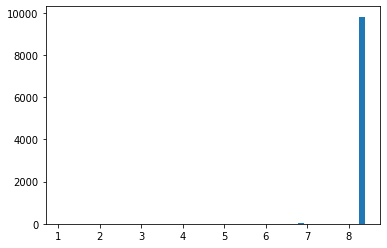

In [17]:
mu_vals=mu_vals[1:10000]  #ignore first 10%s
plt.hist(mu_vals,50) # plot mu's
plt.show()

In [18]:
np.mean(mu_vals)

8.313359425902975

   prior_old = stats.uniform(5,10).logpdf(mu_old)
    prior_new = stats.uniform(5,10).logpdf(mu_new)
    
    
    post_old=store_like_muold*prior_old
    post_new=store_like_munew*prior_new